In [2]:
# to read and manipulate the data
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score, confusion_matrix

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading data into a pandas dataframe
reviews = pd.read_csv("2.2+imdb_10K_sentimnets_reviews.csv") 

In [5]:
# creating a copy of the data
data = reviews.copy()

# Data Overview

## Checking the first 5 rows

In [6]:
data.head(5)

,review,sentiment
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",1
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",0
2,"I am a kung fu fan, but not a Woo fan. I have no interest in gangster movies filled with over-the-top gun-play. Now, martial arts; *that's* beautiful! And John Woo surprised me here by producing a highly entertaining kung fu movie, which almost has *too much* fighting, if such a thing is possible! This is good stuff.<br /><br />Many of the fight scenes are very good (and some of them are less good), and the main characters are amusing and likable. The bad guys are a bit too unbelievably evil, but entertaining none the less. You gotta see the Sleeping Wizard!! He can only fight when he's asleep - it's hysterical!<br /><br />Upon repeated viewings, however, Last Hurrah For Chivalry can tend to get a little boring and long-winded, also especially because many of the fight scenes are actually not that good. Hence, I rate it ""only"" a 7 out of 10. But it really is almost an ""8"".<br /><br />All in all one of the better kung fu movies, made smack-dab in the heart of kung fu cinema's prime. All the really good kung fu movies are from the mid- to late 1970ies, with some notable exceptions from the late '60ies and early '70ies (and early '80ies, to be fair).",1
3,"He seems to be a control freak. I have heard him comment on ""losing control of the show"" and tell another guest who brought live animals that he had one rule-""n

In [19]:
data['sentiment'].unique()

array([1, 0])

## Checking the shape

In [7]:
data.shape

(10000, 2)


## **Checking for missing values**


In [9]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64


## Checking for duplicate values

In [10]:

# checking for duplicate values
data.duplicated().sum()

18

In [11]:

# keeping only the first occurence of duplicate values and dropping the rest
data = data.drop_duplicates(keep='first')

In [12]:

# reseting the index of the dataframe
data = data.reset_index(drop=True)

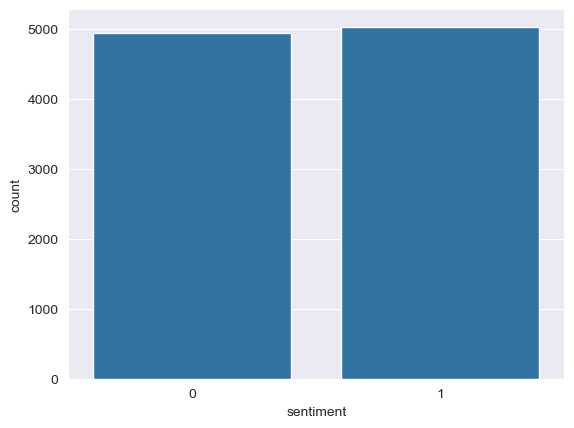

In [13]:

## **Checking the distribution of sentiments**
sns.countplot(data=data, x='sentiment');

# Defining the transformer

In [14]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# other models to choose from
# https://www.sbert.net/docs/pretrained_model.html
# https://huggingface.co/spaces/mteb/leaderborad
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')

## Encoding the dataset

In [15]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# encoding the dataset
embedding_matrix = model.encode(data['review'], show_progress_bar=True, device=device)

Batches: 100%|██████████| 312/312 [02:16<00:00,  2.28it/s]


# Sentiments Analysis Model Building

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [24]:
X = embedding_matrix
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
rf_transformer = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [29]:
y_pred_train = rf_transformer.predict(X_train)
y_pred_test = rf_transformer.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def plot_consfusion_matric(actual, predicted, labels=None):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

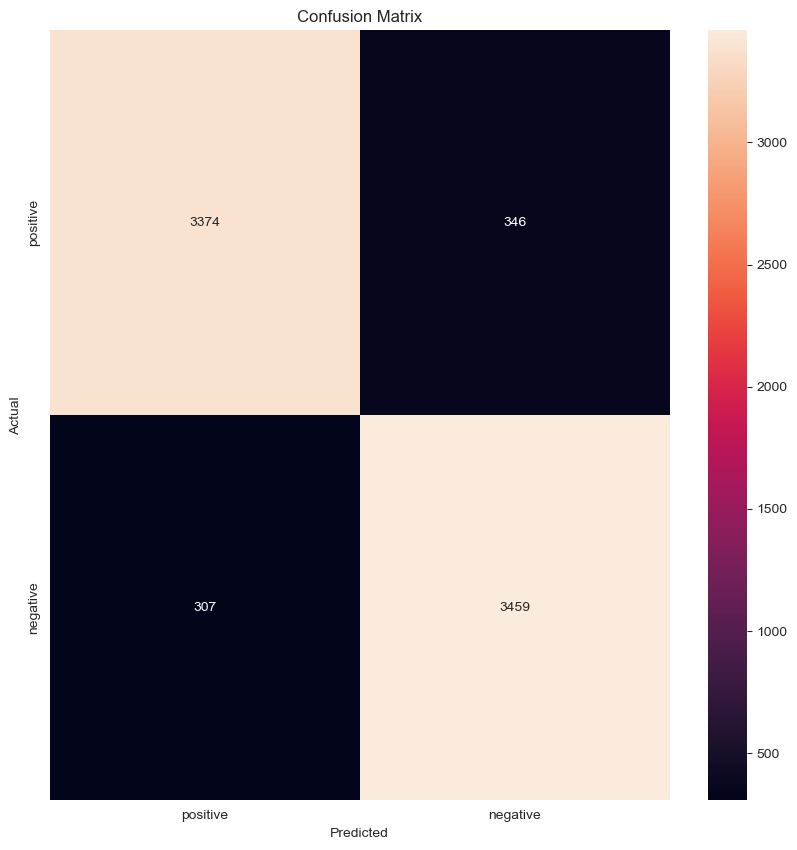

In [38]:
plot_consfusion_matric(y_train, y_pred_train, labels=['positive', 'negative'])

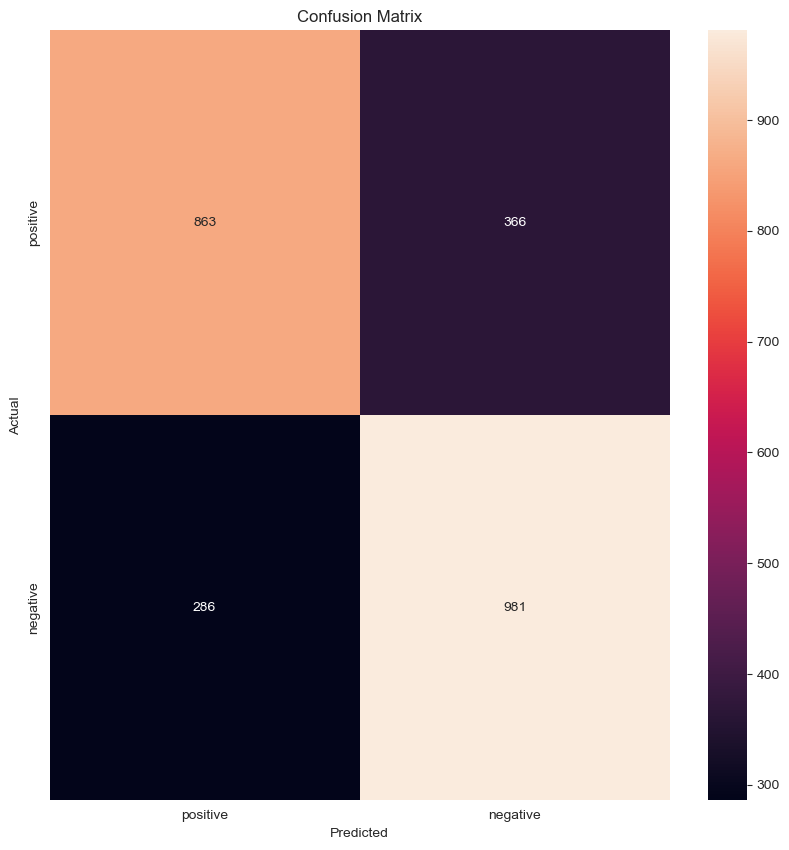

In [39]:
plot_consfusion_matric(y_test, y_pred_test, labels=['positive', 'negative'])

# Using a pre trained model 


In [40]:
from transformers import pipeline

In [41]:
sentiment_hf = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


we can choose to use any other model by including a model argument like:
```python
sentiment_hf = pipeline(model="finiteautomata/bretweet-base-sentiment-analysis)
```
or
nlptown/bret-base-multilinggual-uncased-sentiment
many more models can be found at https://huggingace.co/models?pipleline_tag=text-classification&sort=trending&serach=sentimnent
these are all text-classification models...sentiment analysis is a special case of test classifiation



In [42]:
trial_data = [
    "I love this movie",
    "I hate this movie",
    "I am happy",
    "I am sad",
    "I am tired",
    "I am bored"
]

In [43]:
sentiment_hf(trial_data)

[{'label': 'POSITIVE', 'score': 0.9998766183853149},
 {'label': 'NEGATIVE', 'score': 0.9996687173843384},
 {'label': 'POSITIVE', 'score': 0.9998801946640015},
 {'label': 'NEGATIVE', 'score': 0.9991856217384338},
 {'label': 'NEGATIVE', 'score': 0.9997807145118713},
 {'label': 'NEGATIVE', 'score': 0.9998152852058411}]

In [45]:
hf_review_dict = sentiment_hf(data['review'].to_list(), truncation=True) # very long review will be truncated to 512 tokens...which isn't greate!

Create a new vector hf_review_sent 

## Google FLAN-T5
FLAN-T5 developed by Google Research, is a "Fine tuned LAnguage Net" FLAN with Text-To-Text Transfer Transformer T-5

In [46]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [47]:
# initialize a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')

ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [ ]:
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small', load_in_8bit=True, device_map="auto")

In [ ]:
# defining a function to generate, process, and return aresponse
def generate_response(promt):
    input_ids = tokenizer.encode(promt, return_tensors='pt')
    ouputs = model.generate(input_ids, max_length=16, do_sample=True, early_stopping=True, temperature=0.001)
    return tokenizer.decode(ouputs[0])[6:-4]

in the generate() function define above, the following arguments were used:
1. max_length: this parameter determines the maximum lenght of the generated sequence. In the provided code, max_length is set to 300, which means the generated sequence should bot exceed 300 tokens
2. temperature: the temperature parameter controls the level of randomness in the generation process. A higher temperature (e.g., closer to 1) makes the output more diverse and creative but potentially less focused, while a lower temprature (e.g., close to 9) produces more deterministic and focused but potentially repetitive outputs. In the code, temperature is set to 0.001, indicating a very low temperature and consequently, a more deterministic sampling. 
3. do_sample: this is a boolean parameter that determines whether to use sampling during generation (do_sample=True) or use greedy decoding (do_sample=False). When set to True, as in the provided code, the model samples from the distribution of predicated tokens at each step, introducing randomness in the generation process. 